In [376]:
#Set the Group and the size n
n=4
W = Permutations(n);

In [377]:
def dominant_elements(W): 
    for u in W:
        if u.avoids([1,3,2]): 
            yield u
            
def square (x, y, s, color = "black"):
    return polygon([[x,y], [x+s,y],[x+s,y+s],[x,y+s]], color = color)

def lehmer_diagram(w): 
    out = []
    
    for i in range(0, len(w)):
        for j in range(i + 1, len(w)):
            if w[i] > w[j]: 
                out.append((i, w[j] - 1))
    
    return out;

def interval_diagram (u, v, color): 
    n = len(u)
    out = [polygon([[0,0], [n,0],[n,n],[0,n]], color = "#EEEEEE", axes = False)];
    
    for (x, y) in lehmer_diagram(v):
        out.append(square(x, n - y - 1, 1, color));

    for i in range(0, len(u)):
        out.append(circle((i + .5, n - (u[i] + .5) + 1),.1, color="grey", thickness=3))
        
    for i in range(0, n):
        out.append(circle((i + .5, n - (v[i] + .5) + 1), .08, color=color, fill= True))

    for (x, y) in lehmer_diagram(u):
        out.append(square(x, n - y - 1, 1, "grey")); 
    
    return sum(out)


colors = [
    "#819aff",
    "#66d9ef",
    "#a6e22e",
    "#ae81ff",
    "#f92672",
    "#e2e22e",
    "#56adbc",
    "#86b42b"
]



In [378]:
def all_perfect_matchings_graph(G_0):
    """
    Return list of all perfect matchings of graph G (as lists of edges (u,v) with u<v).
    G must have an even number of vertices.
    Warning: exponential in size of G.
    """
    G = G_0.relabel(lambda x: x + 1, inplace=False)
    V = list(G.vertices())
    n = len(V)
    if n % 2 == 1:
        return []
    # map vertex to index for consistent ordering
    V.sort()
    used = {v: False for v in V}
    results = []

    def backtrack(current):
        # find first unused vertex
        try:
            v = next(w for w in V if not used[w])
        except StopIteration:
            results.append(list(current))
            return
        used[v] = True
        for u in V:
            if not used[u] and G.has_edge(v, u):
                used[u] = True
                a,b = (v,u) if v <= u else (u,v)
                current.append((a,b))
                backtrack(current)
                current.pop()
                used[u] = False
        used[v] = False

    backtrack([])
    return results


In [354]:
def southeast_border_path(edges):
    """
    Given permutation u, return the southeast border path of its Lehmer diagram
    in the same coordinate system used for drawing in interval_diagram.
    """
    #adding borders
    edges[-1] = 0
    path = ''

    for row_step in range(n):
        if row_step in edges.keys():
            path = path + 'N'* (edges[row_step] - edges[row_step-1]) + 'E'
        else: 
            leftover_N = n-path.count('N')
            leftover_E = n-path.count('E')
            path = path + 'N'*leftover_N +  'E'*leftover_E

    return path


def segments_intersect(A, B, C, D):
    """
    Return True if line segments AB and CD intersect.
    Each point is a tuple (x, y).
    """

    def ccw(X, Y, Z):
        """Check if the sequence of points is counter-clockwise."""
        return (Z[1] - X[1]) * (Y[0] - X[0]) >= (Y[1] - X[1]) * (Z[0] - X[0])

    # Check if the segments straddle each other
    return (ccw(A, C, D) != ccw(B, C, D)) and (ccw(A, B, C) != ccw(A, B, D))
    

def interval_diagram_w_lattice(u, v, color):
    n = len(u)
    assert u in dominant_elements(W), 'u is not dominant'
    out = [polygon([[0,0], [n,0],[n,n],[0,n]], color="#EEEEEE", axes=False)]
    outer_edges = {}
    s, t = 0,0
    path = [(s,t)]
    
    # Squares for v's Lehmer diagram
    for (x, y) in lehmer_diagram(v):
        out.append(square(x, n - y - 1, 1, color))

    # Grey circles for u
    for i in range(len(u)):
        out.append(circle((i + .5, n - (u[i] + .5) + 1), .1, color="grey", thickness=3))
        
    # Filled circles for v
    # for i in range(n):
    #     out.append(circle((i + .5, n - (v[i] + .5) + 1), .08, color=color, fill=True))

    # Grey boxes for u's Lehmer diagram
    for (x, y) in lehmer_diagram(u):
        grey = {(x, n - y - 1)}
        out.append(square(x, n - y - 1, 1, "grey"))  
        if x not in outer_edges or n-y-1 < outer_edges[x]:
            outer_edges[x] = n-y-1
            
   # === Add southeast border path ===
    border = southeast_border_path(outer_edges)
    #print(border)
    pts = [(0,0)]
    x,y = 0,0
    for ch in border:
        if ch == 'E':
            x += 1
        elif ch == 'N':
            y += 1
        pts.append((x,y))

    segments = []
    segment_positions = []
    label = []
    for i in range(len(pts)-1):
        a = pts[i]; b = pts[i+1]
        mid_x = (a[0] + b[0]) / 2
        mid_y = (a[1] + b[1]) / 2
    
        # Label with the step number
        label.append(text(str(i+1), (mid_x, mid_y), color='blue', fontsize=10))
        segments.append(line([a,b], thickness=2, color='red'))
        segment_positions.append((a,b))


    # === Add NS hooks for each element of v
    v_lines = []
    matching = []

    for i in range(n):
        v_position = (i + .5, n - (v[i] + .5) + 1)
        out.append(circle((i + .5, n - (v[i] + .5) + 1), .08, color=color, fill=True))

        v_lines.append(line([v_position, (v_position[0], n)], color='blue', linestyle='--'))
        v_lines.append(line([v_position, (0, v_position[1])], color='blue', linestyle='--'))



        #=== MATCHING ===

        
        for (A,B) in segment_positions: 
            #print(segments_intersect(v_position, (v_position[0], n), A, B))
            if segments_intersect(v_position, (v_position[0], n), A, B):
                m1= segment_positions.index((A,B)) +1
                #print(v_position, (v_position[0], n))
                #print(A,B)
    
            #print(segments_intersect(v_position, (v_position[0], n), A, B))
            elif segments_intersect(v_position, (0, v_position[1]), A, B):
                m0= segment_positions.index((A,B))  +1
                # print(A,B)
                # print(m1)
                
        matching.append((m0,m1))
                
        
 
    
    #----------------

    
    plot_elements = sum(out) + sum(segments) + sum(label) + sum(v_lines)
    #print(matching)
    return plot_elements, matching

In [355]:
#From matching to circular diagram

def draw_perfect_matching(matching, n):
    """
    Draws a perfect matching on 2n points arranged in a circle.
    `matching` is a list of 2-element tuples representing matched pairs.
    Rotates the diagram 90 degrees counterclockwise.
    """
    points = []
    labels = []
    for i in range(2 * n):
        angle = -2 * pi * i / (2 * n) + pi/2  # 90° counter-clockwise
        x = cos(angle)
        y = sin(angle)
        points.append((x, y))
        labels.append(text(str(i + 1), (1.2 * x, 1.2 * y), fontsize=30))

    G = circle((0, 0), 1, color='black', axes=False) + sum(labels)

    for a, b in matching:
        x1, y1 = points[a - 1]
        x2, y2 = points[b - 1]
        G += line([(x1, y1), (x2, y2)], color='blue')

    return G

def graphics_to_img(g,i, width=60, height=60):
    """
    Convert a Sage Graphics object into an HTML <img> tag.
    """
    return g.save(str(i) + ".png", dpi=100)

# From Bruhat interval to matchings (bijective dictionary)

In [379]:
match_to_int_bij = {}
int_to_match_bij = {}
for u in dominant_elements(W):
    for v in u.bruhat_greater():
        #print(u,v)
        diag, matching = interval_diagram_w_lattice(u,v, colors[0])
        int_to_match_bij[(u,v)] = matching
        match_to_int_bij[Permutation(matching)] = (u,v)
        #show(diag, figsize=[1,1])
#int_to_match_bij
#match_to_int_bij

In [380]:
#Fact check: make sure all (2n-1)!! matchings are there by comparing with the matchings we obtain from K_n graph
#To make sure we are encoding the matchings correctly, convert matching to involutions (cycle notation)
K=graphs.CompleteGraph(2*n)
match_from_K = all_perfect_matchings_graph(K)
len(match_from_K) == (2*n-1).multifactorial(2)

True

In [381]:
#match in Cylce Notaiton = converting regular shmegular matchings into cycle notation 
match_in_CN = [Permutation(match) for match in list(int_to_match_bij.values())]
all(Permutation(m) in match_in_CN for m in match_from_K)

True

# Translated Bruhat Intevals

In [382]:
shifted_intervals = [];
pairs_grouped_by_interval = {}
bruhat_to_class_presort = {}

def shifted_interval (u, v): 
    W = u.parent();
    interval = set()
    for x in W.bruhat_interval(u, W(v)):
        interval.add(u^(-1)*x) 
    return frozenset(interval)

for u in dominant_elements(W): 
    for v in u.bruhat_greater():
        interval = shifted_interval(u,v)

        if interval in shifted_intervals:
            i = shifted_intervals.index(interval)
        else:
            i = len(shifted_intervals) 
            pairs_grouped_by_interval[i] = [] 
            shifted_intervals.append(frozenset(interval))
            
        pairs_grouped_by_interval[i].append((u,v)) 
        bruhat_to_class_presort[(u,v)] = i
        
bruhat_to_class = dict(sorted(bruhat_to_class_presort.items(), key=lambda item: item[1]))

##Print outs of interval diagrams of translated (u,v)
# c=0

# for i in pairs_grouped_by_interval:
#     if i > 0:
#         print(shifted_intervals[i])
#         for (u, v) in pairs_grouped_by_interval[i]:
#             show(interval_diagram(u, v, colors[c % 8]), figsize=[1,1]) 
#         c=c+1
#         print("---")

In [360]:
#How do the matchings of these look like?
#Bruhat interval, Translated Class, matching, diagram
rows = []
rows.append(['No.', 'Bruhat interval', 'Translated Class', 'Matching', 'Diagram'])
i=0
for (u,v) in list(bruhat_to_class.keys()):
    g=graphics_to_img(draw_perfect_matching(int_to_match_bij[(u,v)], n),i)
    rows.append([str(i+1), (u,v), bruhat_to_class[(u,v)], int_to_match_bij[(u,v)], "<img src=" + str(i)+ ".png width='60'/>"])
    i+=1

table(rows, header_row=True, frame=True)

┌─────┬────────────────────────┬──────────────────┬──────────────────────────┬──────────────────────────────┐
│ No. │ Bruhat interval        │ Translated Class │ Matching                 │ Diagram                      │
╞═════╪════════════════════════╪══════════════════╪══════════════════════════╪══════════════════════════════╡
│ 1   │ ([1, 2, 3], [1, 2, 3]) │ 0                │ [(3, 4), (2, 5), (1, 6)] │ <img src=0.png width='60'/>  │
├─────┼────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────────────┤
│ 2   │ ([2, 1, 3], [2, 1, 3]) │ 0                │ [(2, 3), (4, 5), (1, 6)] │ <img src=1.png width='60'/>  │
├─────┼────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────────────┤
│ 3   │ ([2, 3, 1], [2, 3, 1]) │ 0                │ [(2, 3), (1, 4), (5, 6)] │ <img src=2.png width='60'/>  │
├─────┼────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────────────┤
│ 4   │ ([3, 1, 2], [3, 1, 2]) │ 0                │ [(1, 2), (4, 5), (3, 6)] │ <img src=3.png width='60'/>  │
├─────┼────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────────────┤
│ 5   │ ([3, 2, 1], [3, 2, 1]) │ 0                │ [(1, 2), (3, 4), (5, 6)] │ <img src=4.png width='60'/>  │
├─────┼────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────────────┤
│ 6   │ ([1, 2, 3], [1, 3, 2]) │ 1                │ [(3, 4), (1, 5), (2, 6)] │ <img src=5.png width='60'/>  │
├─────┼────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────────────┤
│ 7   │ ([2, 1, 3], [3, 1, 2]) │ 1                │ [(1, 3), (4, 5), (2, 6)] │ <img src=6.png width='60'/>  │
├─────┼────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────────────┤
│ 8   │ ([2, 3, 1], [3, 2, 1]) │ 1                │ [(1, 3), (2, 4), (5, 6)] │ <img src=7.png width='60'/>  │
├─────┼────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────────────┤
│ 9   │ ([1, 2, 3], [2, 1, 3]) │ 2                │ [(2, 4), (3, 5), (1, 6)] │ <img src=8.png width='60'/>  │
├─────┼────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────────────┤
│ 10  │ ([3, 1, 2], [3, 2, 1]) │ 2                │ [(1, 2), (3, 5), (4, 6)] │ <img src=9.png width='60'/>  │
├─────┼────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────────────┤
│ 11  │ ([1, 2, 3], [2, 3, 1]) │ 3                │ [(2, 4), (1, 5), (3, 6)] │ <img src=10.png width='60'/> │
├─────┼────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────────────┤
│ 12  │ ([1, 2, 3], [3, 1, 2]) │ 4                │ [(1, 4), (3, 5), (2, 6)] │ <img src=11.png width='60'/> │
├─────┼────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────────────┤
│ 13  │ ([1, 2, 3], [3, 2, 1]) │ 5                │ [(1, 4), (2, 5), (3, 6)] │ <img src=12.png width='60'/> │
├─────┼────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────────────┤
│ 14  │ ([2, 1, 3], [2, 3, 1]) │ 6                │ [(2, 3), (1, 5), (4, 6)] │ <img src=13.png width='60'/> │
├─────┼────────────────────────┼──────────────────┼──────────────────────────┼──────────────────────────────┤
│ 15  │ ([2, 1, 3], [3, 2, 1]) │ 7                │ [(1, 3), (2, 5), (4, 6)] │ <img src=14.png width='60'/> │
└─────┴────────────────────────┴──────────────────┴──────────────────────────┴──────────────────────────────┘

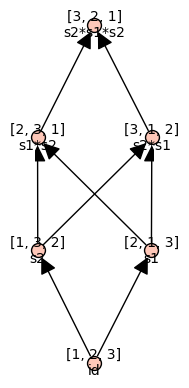

In [361]:
P = W.bruhat_poset()

labels = {}
for w in W:
    # one-line permutation string, e.g. '213'
    one_line = Permutation(w)
    # reduced_word() returns a list like [1,2,1] (Sage Integers); convert to 's1*s2*s1'
    rw = w.reduced_word()
    rw_str = "*".join("s{}".format(int(i)) for i in rw) if rw else "id"
    # include newline so label shows two lines (depends on renderer)
    labels[w] = "{}\n{}".format(one_line, rw_str)

P.show(element_labels=labels, figsize=[4,4], vertex_size=100, fontsize=10)

## Sidequest: what does rotating a matching corresponding to a bruhat interval do to that interval?

In [362]:
 #Plan: take a matching, convert it to a cycle notation permutation, conjugate by a shifting permutation (long cycle)
#Then print out the corresponding bruhat interval

In [363]:
def graphics_to_img_shifted(g,i, width=60, height=60):
    """
    Convert a Sage Graphics object into an HTML <img> tag.
    """
    return g.save(str(i)+"shifted" + ".png", dpi=100)

In [364]:
c = Permutation([tuple(range(1, 2*n + 1))])
c

[2, 3, 4, 5, 6, 1]

In [365]:
shifted

[7, 4, 6, 2, 8, 3, 1, 5]

In [366]:
tuple(shifted)

(7, 4, 6, 2, 8, 3, 1, 5)

In [373]:
(c^2).inverse()

[5, 6, 1, 2, 3, 4]

In [311]:
shifted = (c.inverse()* Permutation(int_to_match_bij[(u,v)])*c).to_cycles()
graphics_to_img(draw_perfect_matching(shifted, n),i)

In [383]:
c = Permutation([tuple(range(1, 2*n + 1))])
k=1
rows = []
rows.append(['No.', 'Bruhat interval', 'Translated Class', 'Matching', 'Diagram', 
             'Shifted Matching', 'Corresponding interval', 'Corresponding class'])
i=0
for (u,v) in list(bruhat_to_class.keys()):
    shifted = ((c^k).inverse()* Permutation(int_to_match_bij[(u,v)])*(c^k))
    #g_shifted = graphics_to_img_shifted(draw_perfect_matching(shifted, n),i)
    g=graphics_to_img(draw_perfect_matching(int_to_match_bij[(u,v)], n),i)
    rows.append([str(i), (u,v), bruhat_to_class[(u,v)], int_to_match_bij[(u,v)], "<img src=" + str(i)+ ".png width='60'/>", 
                 shifted.to_cycles(), match_to_int_bij[shifted], bruhat_to_class[match_to_int_bij[shifted]]])
    i+=1

table(rows, header_row=True, frame=True)

┌─────┬──────────────────────────────┬──────────────────┬──────────────────────────────────┬───────────────────────────────┬──────────────────────────────────┬──────────────────────────────┬─────────────────────┐
│ No. │ Bruhat interval              │ Translated Class │ Matching                         │ Diagram                       │ Shifted Matching                 │ Corresponding interval       │ Corresponding class │
╞═════╪══════════════════════════════╪══════════════════╪══════════════════════════════════╪═══════════════════════════════╪══════════════════════════════════╪══════════════════════════════╪═════════════════════╡
│ 0   │ ([1, 2, 3, 4], [1, 2, 3, 4]) │ 0                │ [(4, 5), (3, 6), (2, 7), (1, 8)] │ <img src=0.png width='60'/>   │ [(1, 2), (3, 8), (4, 7), (5, 6)] │ ([4, 1, 2, 3], [4, 1, 2, 3]) │ 0                   │
├─────┼──────────────────────────────┼──────────────────┼──────────────────────────────────┼───────────────────────────────┼──────────────────────────────────┼──────────────────────────────┼─────────────────────┤
│ 1   │ ([2, 1, 3, 4], [2, 1, 3, 4]) │ 0                │ [(3, 4), (5, 6), (2, 7), (1, 8)] │ <img src=1.png width='60'/>   │ [(1, 2), (3, 8), (4, 5), (6, 7)] │ ([4, 2, 1, 3], [4, 2, 1, 3]) │ 0                   │
├─────┼──────────────────────────────┼──────────────────┼──────────────────────────────────┼───────────────────────────────┼──────────────────────────────────┼──────────────────────────────┼─────────────────────┤
│ 2   │ ([2, 3, 1, 4], [2, 3, 1, 4]) │ 0                │ [(3, 4), (2, 5), (6, 7), (1, 8)] │ <img src=2.png width='60'/>   │ [(1, 2), (3, 6), (4, 5), (7, 8)] │ ([4, 2, 3, 1], [4, 2, 3, 1]) │ 0                   │
├─────┼──────────────────────────────┼──────────────────┼──────────────────────────────────┼───────────────────────────────┼──────────────────────────────────┼──────────────────────────────┼─────────────────────┤
│ 3   │ ([2, 3, 4, 1], [2, 3, 4, 1]) │ 0                │ [(3, 4), (2, 5), (1, 6), (7, 8)] │ <img src=3.png width='60'/>   │ [(1, 8), (2, 7), (3, 6), (4, 5)] │ ([1, 2, 3, 4], [1, 2, 3, 4]) │ 0                   │
├─────┼──────────────────────────────┼──────────────────┼──────────────────────────────────┼───────────────────────────────┼──────────────────────────────────┼──────────────────────────────┼─────────────────────┤
│ 4   │ ([3, 1, 2, 4], [3, 1, 2, 4]) │ 0                │ [(2, 3), (5, 6), (4, 7), (1, 8)] │ <img src=4.png width='60'/>   │ [(1, 2), (3, 4), (5, 8), (6, 7)] │ ([4, 3, 1, 2], [4, 3, 1, 2]) │ 0                   │
├─────┼──────────────────────────────┼──────────────────┼──────────────────────────────────┼───────────────────────────────┼──────────────────────────────────┼──────────────────────────────┼─────────────────────┤
│ 5   │ ([3, 2, 1, 4], [3, 2, 1, 4]) │ 0                │ [(2, 3), (4, 5), (6, 7), (1, 8)] │ <img src=5.png width='60'/>   │ [(1, 2), (3, 4), (5, 6), (7, 8)] │ ([4, 3, 2, 1], [4, 3, 2, 1]) │ 0                   │
├─────┼──────────────────────────────┼──────────────────┼──────────────────────────────────┼───────────────────────────────┼──────────────────────────────────┼──────────────────────────────┼─────────────────────┤
│ 6   │ ([3, 2, 4, 1], [3, 2, 4, 1]) │ 0                │ [(2, 3), (4, 5), (1, 6), (7, 8)] │ <img src=6.png width='60'/>   │ [(1, 8), (2, 7), (3, 4), (5, 6)] │ ([2, 1, 3, 4], [2, 1, 3, 4]) │ 0                   │
├─────┼──────────────────────────────┼──────────────────┼──────────────────────────────────┼───────────────────────────────┼──────────────────────────────────┼──────────────────────────────┼─────────────────────┤
│ 7   │ ([3, 4, 1, 2], [3, 4, 1, 2]) │ 0                │ [(2, 3), (1, 4), (6, 7), (5, 8)] │ <img src=7.png width='60'/>   │ [(1, 6), (2, 5), (3, 4), (7, 8)] │ ([2, 3, 4, 1], [2, 3, 4, 1]) │ 0                   │
├─────┼──────────────────────────────┼──────────────────┼──────────────────────────────────┼───────────────────────────────┼──────────────────────────────────┼───────

In [ ]:
# Full matchings on a circular diagram (Sage/Python)
# --------------------------------------------------
# Vertices 1..2n on a circle in clockwise order.
# Extra points sit just clockwise of each odd vertex: positions 1.5, 3.5, ..., (2n-1)+0.5.
# A perfect matching M is "full" iff for every pair of extra points p<q,
# the chord (p,q) crosses at least one edge of M.

from itertools import combinations

def all_perfect_matchings(labels):
    """
    Generate all perfect matchings on 'labels' (an even-sized iterable of ints).
    Each matching is a tuple of 2-tuples (i,j) with i<j, sorted by first then second.
    """
    labels = tuple(sorted(labels))
    if not labels:
        yield tuple()
        return
    a = labels[0]
    for b in labels[1:]:
        pair = (a, b)
        rest = tuple(x for x in labels if x not in pair)
        for sub in all_perfect_matchings(rest):
            M = tuple(sorted(((min(x,y), max(x,y)) for (x,y) in (sub + (pair,))), key=lambda e:(e[0],e[1])))
            yield M

def chord_crosses(a, b, c, d):
    """
    Return True iff chords (a,b) and (c,d) cross when points lie on a circle
    with cyclic order labeled by their numeric values and chords drawn as straight segments in the convex polygon.
    Assumes all endpoints are distinct and a<b, c<d (works with non-integers too).
    Crossing condition (convex n-gon): a<c<b<d or c<a<d<b.
    """
    if a > b: a, b = b, a
    if c > d: c, d = d, c
    return (a < c < b < d) or (c < a < d < b)

def is_full_matching(M, n):
    """
    Check if perfect matching M on {1..2n} is 'full' given extra points at odd+.5.
    For every pair of extra points p<q among {1.5, 3.5, ..., (2n-1)+0.5},
    require that the chord (p,q) crosses at least one matching edge in M.
    """
    extras = [k + 0.5 for k in range(1, 2*n, 2)]  # 1.5, 3.5, ..., (2n-1)+0.5
    for p, q in combinations(extras, 2):
        # Does (p,q) cross at least one matching edge?
        crosses_any = any(chord_crosses(p, q, i, j) for (i, j) in M)
        if not crosses_any:
            return False
    return True

def full_matchings(n):
    """
    Enumerate all 'full' perfect matchings for size n.
    Returns a list of matchings; each matching is a tuple of pairs (i,j) with i<j.
    """
    labels = range(1, 2*n + 1)
    out = []
    for M in all_perfect_matchings(labels):
        if is_full_matching(M, n):
            out.append(M)
    return out

def pretty_matching(M):
    return "{" + ", ".join(f"({i},{j})" for (i,j) in M) + "}"

# -------------------------
# Demo / Example for n = 3:
# -------------------------
if __name__ == "__main__":
    n = 7
    F = full_matchings(n)
    print(f"n={n}: found {len(F)} full matching(s).")
    for M in F:
        print(pretty_matching(M))


n=7: found 68928 full matching(s).
{(1,2), (3,4), (5,6), (7,8), (9,10), (11,12), (13,14)}
{(1,2), (3,4), (5,6), (7,8), (9,10), (11,13), (12,14)}
{(1,2), (3,4), (5,6), (7,8), (9,11), (10,12), (13,14)}
{(1,2), (3,4), (5,6), (7,8), (9,11), (10,13), (12,14)}
{(1,2), (3,4), (5,6), (7,8), (9,12), (10,13), (11,14)}
{(1,2), (3,4), (5,6), (7,8), (9,12), (10,14), (11,13)}
{(1,2), (3,4), (5,6), (7,8), (9,13), (10,12), (11,14)}
{(1,2), (3,4), (5,6), (7,8), (9,13), (10,14), (11,12)}
{(1,2), (3,4), (5,6), (7,9), (8,10), (11,12), (13,14)}
{(1,2), (3,4), (5,6), (7,9), (8,10), (11,13), (12,14)}
{(1,2), (3,4), (5,6), (7,9), (8,11), (10,12), (13,14)}
{(1,2), (3,4), (5,6), (7,9), (8,11), (10,13), (12,14)}
{(1,2), (3,4), (5,6), (7,9), (8,12), (10,13), (11,14)}
{(1,2), (3,4), (5,6), (7,9), (8,12), (10,14), (11,13)}
{(1,2), (3,4), (5,6), (7,9), (8,13), (10,12), (11,14)}
{(1,2), (3,4), (5,6), (7,9), (8,13), (10,14), (11,12)}
{(1,2), (3,4), (5,6), (7,10), (8,11), (9,12), (13,14)}
{(1,2), (3,4), (5,6), (7,10), 

In [350]:
list(generate_perfect_matchings(list(range(1,7))))

[[(1, 2), (3, 4), (5, 6)],
 [(1, 2), (3, 5), (4, 6)],
 [(1, 2), (3, 6), (4, 5)],
 [(1, 3), (2, 4), (5, 6)],
 [(1, 3), (2, 5), (4, 6)],
 [(1, 3), (2, 6), (4, 5)],
 [(1, 4), (2, 3), (5, 6)],
 [(1, 4), (2, 5), (3, 6)],
 [(1, 4), (2, 6), (3, 5)],
 [(1, 5), (2, 3), (4, 6)],
 [(1, 5), (2, 4), (3, 6)],
 [(1, 5), (2, 6), (3, 4)],
 [(1, 6), (2, 3), (4, 5)],
 [(1, 6), (2, 4), (3, 5)],
 [(1, 6), (2, 5), (3, 4)]]